In [7]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



Loading Dataset(MIMIC-III) from kaggle

In [8]:


# Define path to dataset folder
data_dir = r"C:\Users\rishita\Desktop\SIH\Readmission-prediction-for-heart-failure-patients\mimic"

# Load key datasets
patients = pd.read_csv(os.path.join(data_dir, "PATIENTS.csv"))
admissions = pd.read_csv(os.path.join(data_dir, "ADMISSIONS.csv"))
diagnoses = pd.read_csv(os.path.join(data_dir, "DIAGNOSES_ICD.csv"))

Checking for missing values

In [9]:
# Check dataset structure
print("Patients DataFrame:")
print(patients.info())

print("\nAdmissions DataFrame:")
print(admissions.info())

print("\nDiagnoses DataFrame:")
print(diagnoses.info())

# Check missing values
print("\nMissing values in Patients dataset:")
print(patients.isnull().sum())

print("\nMissing values in Admissions dataset:")
print(admissions.isnull().sum())

print("\nMissing values in Diagnoses dataset:")
print(diagnoses.isnull().sum())

Patients DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       100 non-null    int64 
 1   subject_id   100 non-null    int64 
 2   gender       100 non-null    object
 3   dob          100 non-null    object
 4   dod          100 non-null    object
 5   dod_hosp     70 non-null     object
 6   dod_ssn      77 non-null     object
 7   expire_flag  100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB
None

Admissions DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non

Exploratory Data Analysis


Summary Statistics:
             row_id    subject_id  expire_flag
count    100.000000    100.000000        100.0
mean   20452.580000  26162.330000          1.0
std    10982.043163  16201.834705          0.0
min     9467.000000  10006.000000          1.0
25%     9526.500000  10068.500000          1.0
50%    20209.000000  25128.000000          1.0
75%    31391.250000  42276.500000          1.0
max    31872.000000  44228.000000          1.0


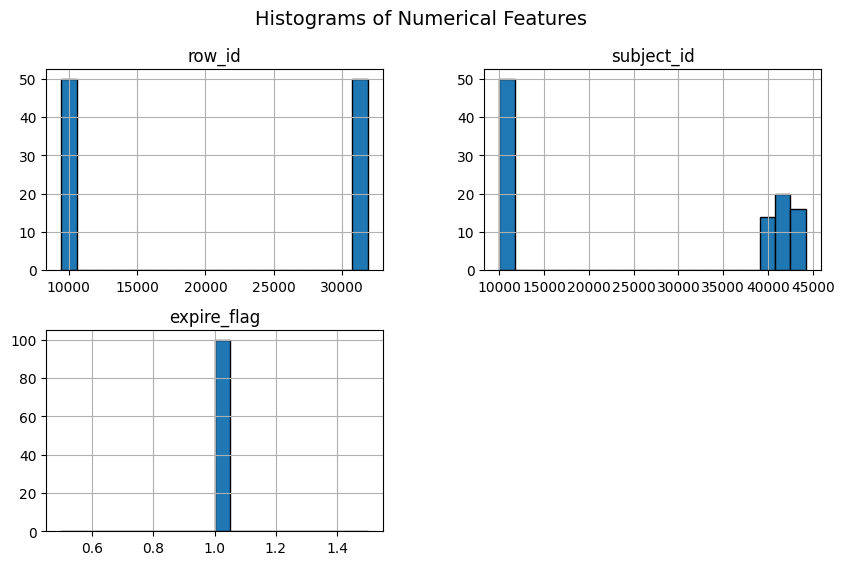


Gender distribution:
gender
F    55
M    45
Name: count, dtype: int64


C:\Users\rishita\AppData\Local\Temp\ipykernel_15144\3593529513.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=patients['gender'], palette='pastel')


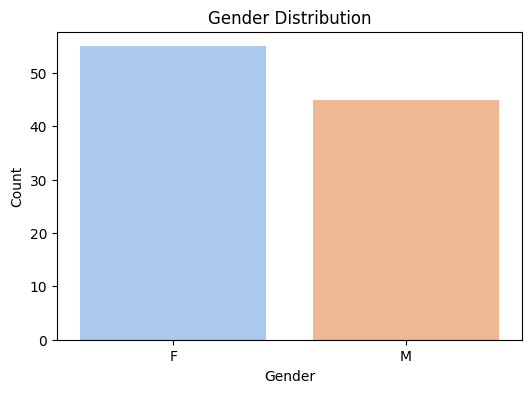


Admission Types:
admission_type
EMERGENCY    119
ELECTIVE       8
URGENT         2
Name: count, dtype: int64


C:\Users\rishita\AppData\Local\Temp\ipykernel_15144\3593529513.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=admissions['admission_type'], palette='pastel', order=admissions['admission_type'].value_counts().index)


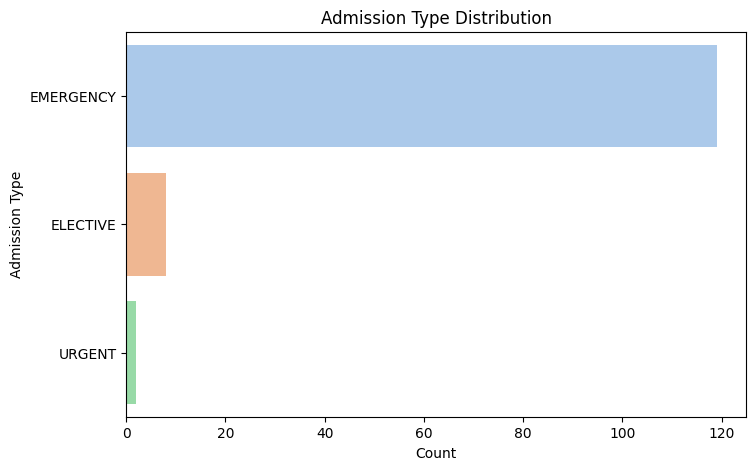

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
print("\nSummary Statistics:")
print(patients.describe())

# Histogram for numerical features
patients.hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

# Gender Distribution
print("\nGender distribution:")
print(patients['gender'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x=patients['gender'], palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Admission Types
print("\nAdmission Types:")
print(admissions['admission_type'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(y=admissions['admission_type'], palette='pastel', order=admissions['admission_type'].value_counts().index)
plt.title("Admission Type Distribution")
plt.xlabel("Count")
plt.ylabel("Admission Type")
plt.show()


EDA continued

    subject_id        dob           admittime        dod  age_at_admission  \
0        10006 2094-03-05 2164-10-23 21:09:00 2165-08-12              70.0   
1        10011 2090-06-05 2126-08-14 22:32:00 2126-08-28              36.0   
2        10013 2038-09-03 2125-10-04 23:36:00 2125-10-07              87.0   
3        10017 2075-09-21 2149-05-26 17:19:00 2152-09-12              74.0   
4        10019 2114-06-20 2163-05-14 20:43:00 2163-05-15              49.0   
5        10026 1895-05-17 2195-05-17 07:39:00 2195-11-24               NaN   
6        10027 2108-01-15 2190-07-13 07:15:00 2190-09-14              82.0   
7        10029 2061-04-10 2139-09-22 10:58:00 2140-09-21              78.0   
8        10032 2050-03-29 2138-04-02 19:52:00 2138-05-21              88.0   
9        10033 2051-04-21 2132-12-05 02:46:00 2133-09-09              81.0   
10       10035 2053-04-13 2129-03-03 16:06:00 2133-03-30              76.0   
11       10036 1885-03-24 2185-03-24 16:56:00 2185-03-26        

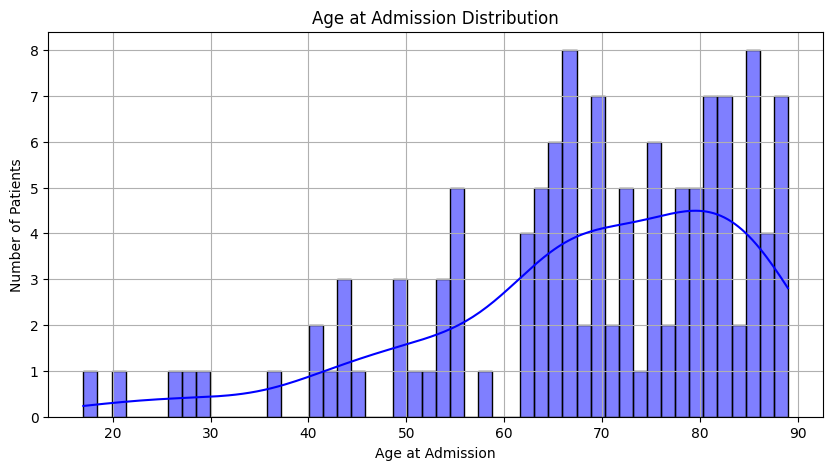

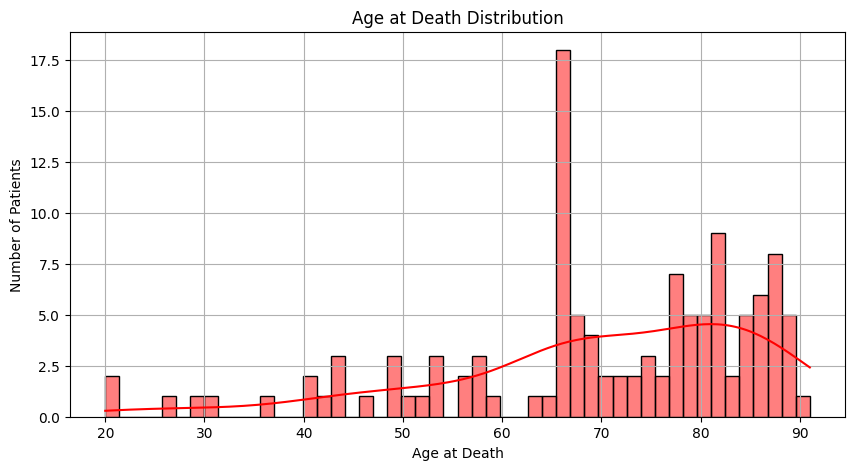

In [11]:
patients['dob'] = pd.to_datetime(patients['dob'], errors='coerce')
patients['dod'] = pd.to_datetime(patients['dod'], errors='coerce')
admissions['admittime'] = pd.to_datetime(admissions['admittime'], errors='coerce')

merged_df = admissions[['subject_id', 'admittime']].merge(
    patients[['subject_id', 'dob', 'dod']], on='subject_id', how='left'
)

# Calculate age at admission
merged_df['age_at_admission'] = merged_df['admittime'].dt.year - merged_df['dob'].dt.year

# Calculate age at death (only for deceased patients)
merged_df['age_at_death'] = merged_df['dod'].dt.year - merged_df['dob'].dt.year

# Remove unrealistic values (negative or above 120)
merged_df.loc[(merged_df['age_at_admission'] < 0) | (merged_df['age_at_admission'] > 120), 'age_at_admission'] = None
merged_df.loc[(merged_df['age_at_death'] < 0) | (merged_df['age_at_death'] > 120), 'age_at_death'] = None

# Display first few rows
print(merged_df[['subject_id', 'dob', 'admittime', 'dod', 'age_at_admission', 'age_at_death']].head(50))


plt.figure(figsize=(10, 5))
sns.histplot(merged_df['age_at_admission'].dropna(), bins=50, kde=True, color='blue')
plt.title("Age at Admission Distribution")
plt.xlabel("Age at Admission")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['age_at_death'].dropna(), bins=50, kde=True, color='red')
plt.title("Age at Death Distribution")
plt.xlabel("Age at Death")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()

Creating a final structured Dataset

In [12]:
# Load primary tables
patients = pd.read_csv(os.path.join(data_dir, "PATIENTS.csv"))
admissions = pd.read_csv(os.path.join(data_dir, "ADMISSIONS.csv"))
diagnoses = pd.read_csv(os.path.join(data_dir, "DIAGNOSES_ICD.csv"))
labevents = pd.read_csv(os.path.join(data_dir, "LABEVENTS.csv"))
chartevents = pd.read_csv(os.path.join(data_dir, "CHARTEVENTS.csv"))
prescriptions = pd.read_csv(os.path.join(data_dir, "PRESCRIPTIONS.csv"))

# Convert column names to lowercase
patients.columns = patients.columns.str.lower()
admissions.columns = admissions.columns.str.lower()
diagnoses.columns = diagnoses.columns.str.lower()
labevents.columns = labevents.columns.str.lower()
chartevents.columns = chartevents.columns.str.lower()
prescriptions.columns = prescriptions.columns.str.lower()

# Convert dates to datetime
patients['dob'] = pd.to_datetime(patients['dob'], errors='coerce')
patients['dod'] = pd.to_datetime(patients['dod'], errors='coerce')
admissions['admittime'] = pd.to_datetime(admissions['admittime'], errors='coerce')
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'], errors='coerce')

demographics = admissions[['subject_id', 'admittime', 'dischtime', 'insurance', 'ethnicity']].merge(
    patients[['subject_id', 'dob', 'dod', 'gender']], on='subject_id', how='left'
)

# Calculate Age at Admission
demographics['age_at_admission'] = demographics['admittime'].dt.year - demographics['dob'].dt.year

# Calculate Age at Death
demographics['age_at_death'] = demographics['dod'].dt.year - demographics['dob'].dt.year

# Remove unrealistic values
demographics.loc[(demographics['age_at_admission'] < 0) | (demographics['age_at_admission'] > 120), 'age_at_admission'] = None
demographics.loc[(demographics['age_at_death'] < 0) | (demographics['age_at_death'] > 120), 'age_at_death'] = None

print(demographics.head())

   subject_id           admittime           dischtime insurance  \
0       10006 2164-10-23 21:09:00 2164-11-01 17:15:00  Medicare   
1       10011 2126-08-14 22:32:00 2126-08-28 18:59:00   Private   
2       10013 2125-10-04 23:36:00 2125-10-07 15:13:00  Medicare   
3       10017 2149-05-26 17:19:00 2149-06-03 18:42:00  Medicare   
4       10019 2163-05-14 20:43:00 2163-05-15 12:00:00  Medicare   

                ethnicity        dob        dod gender  age_at_admission  \
0  BLACK/AFRICAN AMERICAN 2094-03-05 2165-08-12      F              70.0   
1   UNKNOWN/NOT SPECIFIED 2090-06-05 2126-08-28      F              36.0   
2   UNKNOWN/NOT SPECIFIED 2038-09-03 2125-10-07      F              87.0   
3                   WHITE 2075-09-21 2152-09-12      F              74.0   
4                   WHITE 2114-06-20 2163-05-15      M              49.0   

   age_at_death  
0          71.0  
1          36.0  
2          87.0  
3          77.0  
4          49.0  


C:\Users\rishita\AppData\Local\Temp\ipykernel_15144\3141644545.py:6: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv(os.path.join(data_dir, "CHARTEVENTS.csv"))


In [13]:
# Select key vital signs ITEMIDs
vital_signs_ids = {
    'heart_rate': 220045,
    'systolic_bp': 220050,
    'diastolic_bp': 220051,
    'spo2': 220277,
    'respiratory_rate': 220210,
    'temperature': 223761
}

# Filter vitals from CHARTEVENTS
vitals = chartevents[chartevents['itemid'].isin(vital_signs_ids.values())]
vitals = vitals.pivot_table(index=['subject_id'], columns='itemid', values='valuenum', aggfunc='mean')

# Rename columns
vitals.columns = [list(vital_signs_ids.keys())[list(vital_signs_ids.values()).index(col)] for col in vitals.columns]
vitals = vitals.reset_index()

# Select key lab test ITEMIDs
lab_tests_ids = {
    'troponin': 50910,
    'cholesterol': 50907,
    'ldl': 50904,
    'hdl': 50902,
    'creatinine': 50912,
    'bun': 51006,
    'glucose': 50931,
    'hemoglobin': 51222,
    'albumin': 50862
}

# Filter lab results
labs = labevents[labevents['itemid'].isin(lab_tests_ids.values())]
labs = labs.pivot_table(index=['subject_id'], columns='itemid', values='valuenum', aggfunc='mean')

# Rename columns
labs.columns = [list(lab_tests_ids.keys())[list(lab_tests_ids.values()).index(col)] for col in labs.columns]
labs = labs.reset_index()

# Select key medications (Create a copy to avoid SettingWithCopyWarning)
medications = prescriptions[prescriptions['drug'].str.contains("aspirin|beta-blocker|statin|diuretic", case=False, na=False)].copy()

# Convert drug names to binary features using .loc[]
medications.loc[:, 'aspirin'] = medications['drug'].str.contains('aspirin', case=False).astype(int)
medications.loc[:, 'beta_blockers'] = medications['drug'].str.contains('beta-blocker', case=False).astype(int)
medications.loc[:, 'statins'] = medications['drug'].str.contains('statin', case=False).astype(int)
medications.loc[:, 'diuretics'] = medications['drug'].str.contains('diuretic', case=False).astype(int)

# Keep only relevant columns
medications = medications[['subject_id', 'aspirin', 'beta_blockers', 'statins', 'diuretics']].drop_duplicates()

# Extract relevant admission & ICU info
admissions['admittime'] = pd.to_datetime(admissions['admittime'], errors='coerce')
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'], errors='coerce')

# Compute Length of Stay (los) in days
admissions['los'] = (admissions['dischtime'] - admissions['admittime']).dt.total_seconds() / (24 * 3600)
admission_info = admissions[['subject_id', 'hadm_id', 'admission_type', 'admission_location', 'los']]

# Convert categorical to one-hot encoding
admission_info = pd.get_dummies(admission_info, columns=['admission_type', 'admission_location'], drop_first=True)

In [14]:
final_df = demographics.merge(vitals, on='subject_id', how='left')\
                       .merge(labs, on='subject_id', how='left')\
                       .merge(medications, on='subject_id', how='left')\
                       .merge(admission_info, on='subject_id', how='left')

# Fill missing values
final_df.fillna(0, inplace=True)

# Save to CSV
final_df.to_csv("heart_failure_data.csv", index=False)

# Convert dates to datetime format
admissions['admittime'] = pd.to_datetime(admissions['admittime'], errors='coerce')
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'], errors='coerce')

# Sort by subject_id and admission time
admissions = admissions.sort_values(by=['subject_id', 'admittime'])

# Create next admission time per patient
admissions['next_admit'] = admissions.groupby('subject_id')['admittime'].shift(-1)

# Calculate days between discharge and next admission
admissions['days_between'] = (admissions['next_admit'] - admissions['dischtime']).dt.days

# Create readmission flag (1 if readmitted within 30 days, else 0)
admissions['readmission_30d'] = (admissions['days_between'] <= 30).astype(int)

# Keep only required columns
admissions = admissions[['subject_id', 'hadm_id', 'readmission_30d']]

# Merge readmission flag with final dataset
final_df = final_df.merge(admissions[['subject_id', 'readmission_30d']], on='subject_id', how='left')

# Fill missing readmission values (patients with no second admission)
final_df['readmission_30d'].fillna(0, inplace=True)

print("Updated final_df columns:", final_df.columns)

Updated final_df columns: Index(['subject_id', 'admittime', 'dischtime', 'insurance', 'ethnicity', 'dob',
       'dod', 'gender', 'age_at_admission', 'age_at_death', 'heart_rate',
       'systolic_bp', 'diastolic_bp', 'respiratory_rate', 'spo2',
       'temperature', 'albumin', 'hdl', 'ldl', 'cholesterol', 'troponin',
       'creatinine', 'glucose', 'bun', 'hemoglobin', 'aspirin',
       'beta_blockers', 'statins', 'diuretics', 'hadm_id', 'los',
       'admission_type_EMERGENCY', 'admission_type_URGENT',
       'admission_location_EMERGENCY ROOM ADMIT',
       'admission_location_PHYS REFERRAL/NORMAL DELI',
       'admission_location_TRANSFER FROM HOSP/EXTRAM',
       'admission_location_TRANSFER FROM SKILLED NUR', 'readmission_30d'],
      dtype='object')


C:\Users\rishita\AppData\Local\Temp\ipykernel_15144\1953377180.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['readmission_30d'].fillna(0, inplace=True)


Preparing data for training and testing

Creating a database file to be used for test and train split

In [21]:
save_path = r"C:\Users\rishita\Desktop\SIH\Readmission-prediction-for-heart-failure-patients/heart_failure_dataset.csv"  # Windows

final_df.to_csv(save_path, index=False)

print(f"Successfully saved final_df as {save_path}!")


Successfully saved final_df as C:\Users\rishita\Desktop\SIH\Readmission-prediction-for-heart-failure-patients/heart_failure_dataset.csv!
